<a href="https://colab.research.google.com/github/Anjanamb/A04/blob/main/part4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 256)             

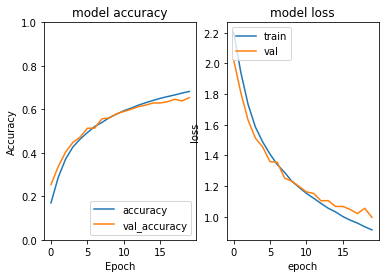

1563/1563 - 18s - loss: 0.8809 - accuracy: 0.6932
313/313 - 4s - loss: 0.9971 - accuracy: 0.6538
train_acc =  0.6932200193405151
train_loss =  0.8809393644332886
test_acc =  0.6538000106811523
test_loss =  0.997122585773468


In [13]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Convert to categorical values 
y_train = tf.keras.utils.to_categorical(train_labels, num_classes=10)
y_test = tf.keras.utils.to_categorical(test_labels, num_classes=10)

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Create the convolutional base
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
# Add Dense layers on top
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

# Complete architecture of our model
model.summary() 

# Compile and train the model
model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, y_train, batch_size=50, epochs=20, 
                    validation_data=(test_images, y_test))

# Evaluate the model
fig = plt.figure()

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title('model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


train_loss, train_acc = model.evaluate(train_images,  y_train, verbose=2)
test_loss, test_acc = model.evaluate(test_images,  y_test, verbose=2)

print("train_acc = ", train_acc)
print("train_loss = ", train_loss)
print("test_acc = ", test_acc)
print("test_loss = ", test_loss)